# Assess predictions

In [1]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import json 

## Read the data

In [2]:
y_test = pd.read_csv("/path/to/y_test.csv")
y_pred = pd.read_csv("/path/to/y_predicted.csv")
with open('/path/to/decoder.json') as json_file:
    decode = json.load(json_file)

## Assess which phenotype each phenotype are wrongly classified as

Text(0.5, 1.0, 'Confusion matrix for predicted phenotypes')

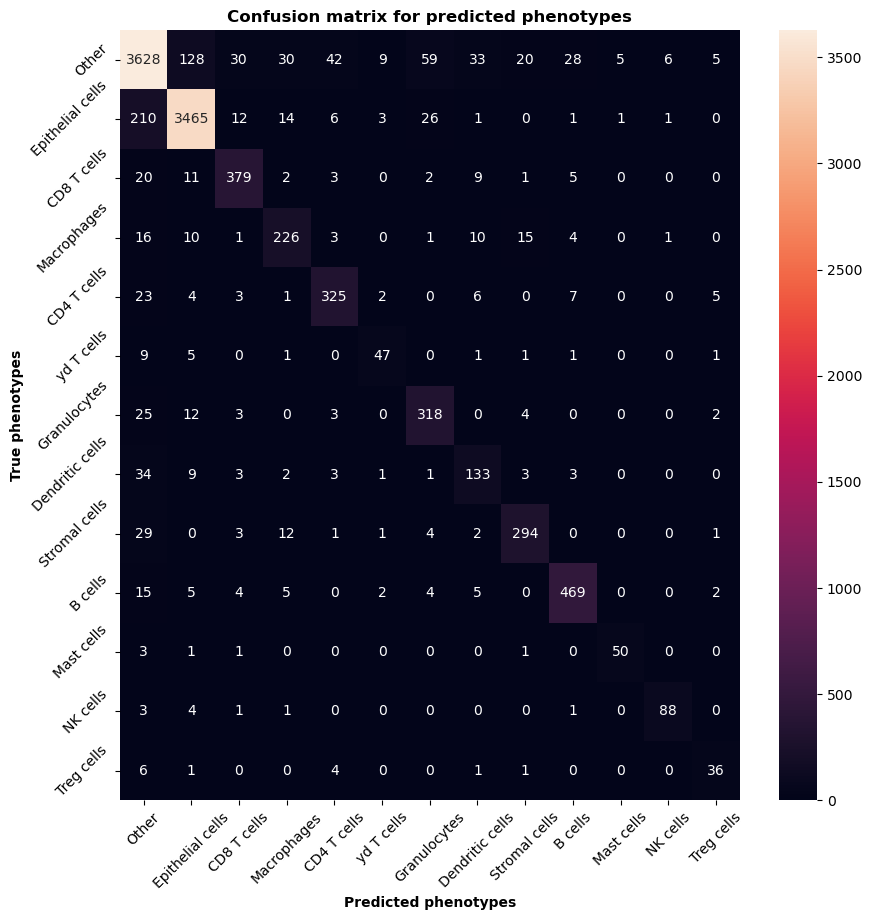

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

phenotypes = y_test.iloc[:, 0].unique()
phenotypes_string = [decode.get(str(x)) for x in phenotypes]

cm = confusion_matrix(y_test.iloc[:, 0], y_pred.iloc[:, 0])
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True,fmt='g')
plt.xticks(phenotypes + 0.5, phenotypes_string, rotation = 45)
plt.yticks(phenotypes + 0.5, phenotypes_string, rotation = 45)
plt.ylabel("True phenotypes", fontweight='bold')
plt.xlabel("Predicted phenotypes", fontweight='bold')
plt.title("Confusion matrix for predicted phenotypes", fontweight='bold')

## Compute the scores 

In [6]:
def per_class(y_test, y_pred, scorer, score_name, classes, decode):
    for class_ in classes:
        bool_arr = y_test == class_
        print("{} score for {}: {}".format(score_name, decode[str(class_)], scorer(y_test[bool_arr], y_pred[bool_arr])))

### Balanced Accuracy

In [7]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred.iloc[:, 0])
print("balanced accuracy score: {}".format(balanced_accuracy))

balanced accuracy score: 0.8399471805839809


### Accuracy Score

In [8]:
accuracy = accuracy_score(y_test, y_pred.iloc[:, 0])
print("overall accuracy score: {}".format(accuracy))
per_class(y_test.iloc[:, 0].values, y_pred.iloc[:, 0].values, accuracy_score, "accuracy", phenotypes, decode)

overall accuracy score: 0.8970030349013657
accuracy score for Epithelial cells: 0.9264705882352942
accuracy score for Other: 0.9018145662440964
accuracy score for B cells: 0.9178082191780822
accuracy score for CD4 T cells: 0.8643617021276596
accuracy score for Stromal cells: 0.8472622478386167
accuracy score for Granulocytes: 0.8664850136239782
accuracy score for CD8 T cells: 0.8773148148148148
accuracy score for yd T cells: 0.7121212121212122
accuracy score for Dendritic cells: 0.6927083333333334
accuracy score for Mast cells: 0.8928571428571429
accuracy score for Macrophages: 0.7874564459930313
accuracy score for NK cells: 0.8979591836734694
accuracy score for Treg cells: 0.7346938775510204


### F1 Score

In [9]:
f1_macro = f1_score(y_test, y_pred.iloc[:, 0], average="macro")
print("f1 score (macro averaged): {}".format(f1_macro))

f1 score (macro averaged): 0.8324752697019289


In [10]:
roc_auc = roc_auc_score(y_test, y_pred.iloc[:, 1:14], multi_class='ovr')
print(roc_auc)

0.9950342539356909
